In [10]:
#Random Forest End to end 
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
X, y = make_classification(
    n_samples=3000,
    n_features=15,
    n_informative=10,
    n_redundant=3,
    n_classes=2,
    random_state=42
)

X = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
y = pd.Series(y, name="target")

X.head()


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14
0,-0.853453,-1.405323,-2.206437,-1.598258,2.859467,1.098740,-4.682270,-1.941424,-3.934440,-2.441149,-0.091175,2.134210,2.156260,0.142911,1.864138
1,4.704867,1.229382,-0.602145,-1.336862,-1.647967,-1.987540,-1.713947,-0.573676,-0.608872,0.483461,0.092367,5.133716,-1.922987,0.725153,-1.851471
2,0.304711,0.957348,-1.625513,1.939574,-4.447217,-0.119920,9.941491,-5.513224,-3.026568,-3.450300,-1.877866,2.491754,2.324894,-0.978200,-2.891114
3,-0.814439,0.185459,-0.811254,-0.566794,2.933140,1.625235,-1.089883,-0.020427,1.517695,-0.449198,0.282421,-3.193672,3.624982,-0.237809,0.589222
4,-0.935102,-2.025539,-1.160516,0.626833,2.173906,0.644331,-2.411717,1.267240,-0.528180,0.329955,-0.699983,0.377404,0.527566,-1.393583,2.680308


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [13]:
rf = RandomForestClassifier(
    n_estimators=200,        # number of trees
    max_depth=None,          # grow full trees
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
y_pred = rf.predict(X_test)


In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.935

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       300
           1       0.94      0.93      0.93       300

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.93       600
weighted avg       0.94      0.94      0.93       600



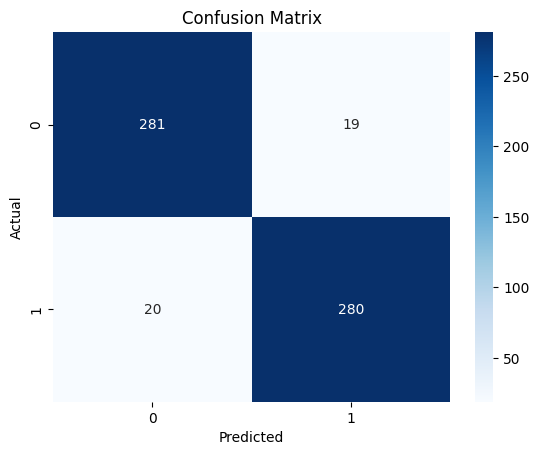

In [16]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [17]:
importances = rf.feature_importances_

feature_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_imp


,Feature,Importance
11,feature_11,0.152422
0,feature_0,0.097495
12,feature_12,0.096390
5,feature_5,0.082793
2,feature_2,0.076690
9,feature_9,0.072027
7,feature_7,0.067060
4,feature_4,0.064995
13,feature_13,0.062267
3,feature_3,0.053795


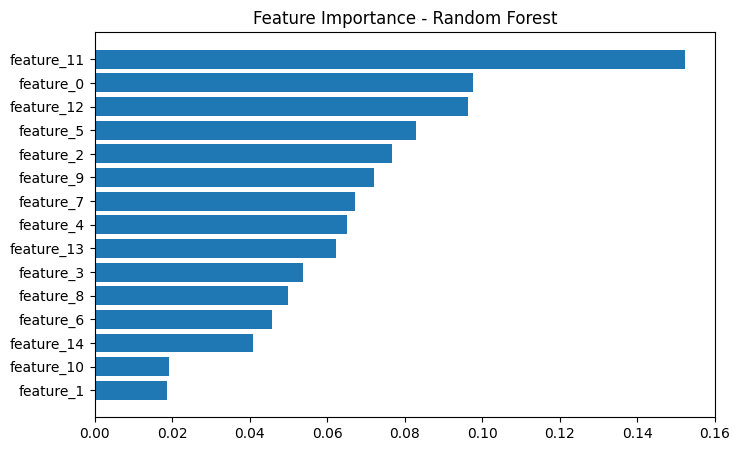

In [18]:
plt.figure(figsize=(8,5))
plt.barh(feature_imp["Feature"], feature_imp["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Random Forest")
plt.show()
